# Bag plot using R within Python (rpy2)

In [1]:
# It is important to import rpy2 objects first otherwise kernel dies

In [2]:
import rpy2.robjects as robjects
robjects.r("library(aplpack)")
bagplot = robjects.r['bagplot']
from rpy2.robjects.packages import importr
utils = importr('utils')
try : 
    aplpack = importr('aplpack')
except:
    utils.install_packages('aplpack')
    aplpack = importr('aplpack')
#import rpy2.robjects.numpy2ri
#rpy2.robjects.numpy2ri.activate()
#---------
from matplotlib.patches import Polygon
import scipy
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

/Users/wahiba/anaconda/envs/dataScience/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: Loading required package: tcltk

  warnings.warn(x, RRuntimeWarning)


In [3]:
# aplpack.bagplot?

In [4]:
def compute_bagplot(x, y, **kwargs):
    """ compute_bagplot calculates bagplot parameters based on the
    method specificed by P. J. Rousseeuw, I. Ruts, J. W. Tukey (1999).
    The bagplot: a bivariate boxplot, The American Statistician,
    vol. 53, no. 4, 382-387.  This function is a wrapper around the
    R function bagplot provided by the aplpack library. 
    Parameters
    ----------
    x : 1-D sequence of floats
       x is the x-coordinate of the data
    y : 1-D sequence of floats
       y is the y-coordinate of the data
    **kwargs specify additional arguments to be passed directly to the
    boxplot function, overriding defaults.
    'factor'          : 2.5,
    'create_plot'     : False,
    'approx_limit'    : 300,
    'show_outlier'    : True,
    'show_looppoints' : True,
    'show_bagpoints'  : True,
    'dkmethod'        : 2,
    'show_whiskers'   : False,
    'show_loophull'   : True,
    'show_baghull'    : True,
    'verbose'         : False
    Returns
    -------
    dict, containing outputs from the R bagplot object
    """
    # Load APLPACK, library which contains the bagplot function
    robjects.r("library(aplpack)")
    robjects.r("library(tcltk)")
    # Import bagplot into the python namespace
    bagplot = robjects.r['bagplot']
    
    # Create an R matrix from the python arrays.
    v = robjects.FloatVector(np.hstack([x, y]))
    m = robjects.r['matrix'](v, ncol=2)

    bag_kwargs = {
        'factor'          : 2.5,
        'create_plot'     : False,
        'approx_limit'    : 300,
        'show_outlier'    : True,
        'show_looppoints' : True,
        'show_bagpoints'  : True,
        'dkmethod'        : 2,
        'show_whiskers'   : False,
        'show_loophull'   : True,
        'show_baghull'    : True,
        'verbose'         : False
    }

    bag_kwargs.update(kwargs)

    # Calculate bagplot data
    bag_data = bagplot(m, **bag_kwargs)

    # Process output results into python data models
    bag_dict = {
        'center'      : np.array(bag_data[0]),
        'hull_center' : np.array(bag_data[1]),
        'hull_bag'    : np.array(bag_data[2]),
        'hull_loop'   : np.array(bag_data[3]),
        'pxy_bag'     : np.array(bag_data[4]),
        'pxy_outer'   : np.array(bag_data[5]),
        'pxy_outlier' : np.array(bag_data[6]),
        'hdepths'     : np.array(bag_data[7]),
        'is_one_dim'  : bool(bag_data[8]),
        'xydata'      : np.array(bag_data[-1]),
    }

    pr_list = bag_data[9]
    pr_dict = {
        'sdev'     : np.array(pr_list[0]),
        'rotation' : np.array(pr_list[1]),
        'center'   : np.array(pr_list[2]),
        'scale'    : bool(pr_list[3]),
        'x'        : np.array(pr_list[4]),
    }
        
    bag_dict['pr_data'] = pr_dict

    return bag_dict


In [5]:
def custom_bagplot(ax, x,y,kwargs, color="r"):
    bag_dict = compute_bagplot(x, y,**kwargs)
    hc_poly = Polygon(np.array(bag_dict['hull_center']),
                      fc=color,alpha=1,
                      ec='none', zorder=0)
    hb_poly = Polygon(np.array(bag_dict['hull_bag']),
                      fc=color,alpha=0.4,
                      ec='none', zorder=0)
    hl_poly = Polygon(np.array(bag_dict['hull_loop']),
                      fc=color,alpha=0.1,
                      ec='none', zorder=0)

    hc_poly_l = Polygon(np.array(bag_dict['hull_center']),
                        ec=color, fc='none',
                      zorder=1, ls='solid')
    hb_poly_l = Polygon(np.array(bag_dict['hull_bag']),
                        ec=color, fc='none',
                      zorder=1, ls='solid')
    hl_poly_l = Polygon(np.array(bag_dict['hull_loop']),
                        ec=color, fc='none',
                      zorder=1, ls='dashed')

    center = bag_dict['center']
    ax.add_patch(hc_poly)
    ax.add_patch(hc_poly_l)


    if kwargs['show_loophull']:
        ax.add_patch(hl_poly)
    if kwargs['show_looppoints']:
        ax.add_patch(hl_poly_l)


    if kwargs['show_baghull' ]:
        ax.add_patch(hb_poly)
    if kwargs['show_bagpoints']:
        ax.add_patch(hb_poly_l)


    ax.plot(center[0], center[1], 'o', color=color,alpha=1)

In [6]:
x = np.random.randint(100,size=50)
y = np.random.randint(300,size=50)
q = compute_bagplot(x, y)
q.keys()

dict_keys(['center', 'hull_center', 'hull_bag', 'hull_loop', 'pxy_bag', 'pxy_outer', 'pxy_outlier', 'hdepths', 'is_one_dim', 'xydata', 'pr_data'])

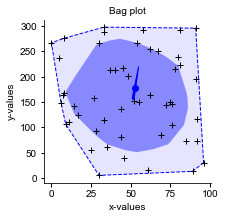

In [7]:
% run figconfig.py
bag_kwargs = {
        'factor'          : 3,
        'approx_limit'    : 300,
        'show_looppoints' : True,
        'show_bagpoints'  : False,
        'show_loophull'   : True,
        'show_baghull'    : True,
    }
fig,ax = plt.subplots(1,1, figsize=(3,3))
ax.plot(x,y,"k+")
custom_bagplot(ax, x,y, bag_kwargs,color="b")
stylize_axes(ax, "Bag plot", "x-values", "y-values", xticks=[], yticks=[], xticklabels=[], yticklabels=[])

In [8]:
# Refs:
# https://github.com/pstjohn/circadian-methods/blob/master/Bagplot.py